# LINKS E FONTES

 * Dataset: https://brasil.io/dataset/covid19/files/
 * Renda per capita dos estados brasileiros: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita
 * Cidades da baixada fluminense:https://pt.wikipedia.org/wiki/Baixada_Fluminense

# DICIONÁRIO DE DADOS

🔍 date: data de coleta dos dados no formato YYYY-MM-DD.

🔍 state: sigla da unidade federativa, exemplo: SP.

🔍 city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

🔍 place_type: tipo de local que esse registro descreve, pode ser city ou state.

🔍 order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

🔍 is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

🔍 city_ibge_code: código IBGE do local.

🔍confirmed: número de casos confirmados.

🔍deaths: número de mortes.

🔍estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).

🔍estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

🔍confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).

🔍death_rate: taxa de mortalidade (mortes / confirmados).

# 0.0. RESUMO

##### Nesse trabalho iremos analisar o dataset **"caso"**, encontrado no link da sessão **LINKS**, logo acima.Tal dataset possui informações sobre os casos de **COVID-19** pelo Brasil, com informações como data, cidade, estado, população, etc.


In [1]:
# Gostaria de saber se os tópicos Markdown estão de acordo com o que foi codificado em seus corpos

# 1.0. IMPORTS E LOADINGS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image as img

## 0.1. Leitura dos dados

In [6]:
dados = pd.read_csv('data/caso.csv')

In [7]:
dados.head(n = 5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-10,AP,NaN,state,53574,766,231,True,845731.0,861773.0,16.0,6216.71832,0.0143
1,2020-11-09,AP,NaN,state,53330,764,230,False,845731.0,861773.0,16.0,6188.40460,0.0143
2,2020-11-08,AP,NaN,state,53010,751,229,False,845731.0,861773.0,16.0,6151.27185,0.0142
3,2020-11-03,AP,NaN,state,52832,751,228,False,845731.0,861773.0,16.0,6130.61676,0.0142
4,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142


# 2.0. DESCRIÇÃO DOS DADOS

## 2.1. Dimensão dos dados

In [8]:
print(f'Número de linhas: {dados.shape[0]}')
print(f'Número de colunas: {dados.shape[1]}')

Número de linhas: 953399
Número de colunas: 13


## 2.2. Tipos e Resumo dos dados

In [9]:
# temos dados nulos nas colunas city, estimated_population_2019, estimated_population, city_ibge_code,
# confirmed_per_100k_inhabitants
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953399 entries, 0 to 953398
Data columns (total 13 columns):
date                              953399 non-null object
state                             953399 non-null object
city                              946939 non-null object
place_type                        953399 non-null object
confirmed                         953399 non-null int64
deaths                            953399 non-null int64
order_for_place                   953399 non-null int64
is_last                           953399 non-null bool
estimated_population_2019         949687 non-null float64
estimated_population              949687 non-null float64
city_ibge_code                    949687 non-null float64
confirmed_per_100k_inhabitants    936240 non-null float64
death_rate                        953399 non-null float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 88.2+ MB


### 2.2.1. Conversão de tipos

In [10]:
# vamos converter a coluna date de object para date

In [11]:
dados.date = pd.to_datetime(dados.date)

## 2.3. Check de Dados faltantes

In [12]:
# veremos o número de dados faltantes em cada coluna
print('Dados faltantes: ')
print(f"Coluna 'city': {dados['city'].isnull().sum()}")
print(f"Coluna 'estimated_population_2019': {dados['estimated_population_2019'].isnull().sum()}")
print(f"Coluna 'estimated_population': {dados['estimated_population'].isnull().sum()}")
print(f"Coluna 'city_ibge_code': {dados['city_ibge_code'].isnull().sum()}")
print(f"Coluna 'confirmed_per_100k_inhabitants': {dados['confirmed_per_100k_inhabitants'].isnull().sum()}")

Dados faltantes: 
Coluna 'city': 6460
Coluna 'estimated_population_2019': 3712
Coluna 'estimated_population': 3712
Coluna 'city_ibge_code': 3712
Coluna 'confirmed_per_100k_inhabitants': 17159


In [13]:
# Vamos analisar alguns dados estatísticos para conhecermos melhor o dataset.

In [14]:
dados[(dados.city == 'Valença') & (dados.state == 'RJ')]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
568878,2020-10-29,RJ,Valença,city,756,24,215,True,76523.0,76869.0,3306107.0,983.49139,0.0317
568879,2020-10-28,RJ,Valença,city,756,24,214,False,76523.0,76869.0,3306107.0,983.49139,0.0317
568880,2020-10-27,RJ,Valença,city,748,24,213,False,76523.0,76869.0,3306107.0,973.08408,0.0321
568881,2020-10-26,RJ,Valença,city,741,24,212,False,76523.0,76869.0,3306107.0,963.97768,0.0324
568882,2020-10-25,RJ,Valença,city,729,24,211,False,76523.0,76869.0,3306107.0,948.36670,0.0329
568883,2020-10-24,RJ,Valença,city,729,24,210,False,76523.0,76869.0,3306107.0,948.36670,0.0329
568884,2020-10-23,RJ,Valença,city,723,24,209,False,76523.0,76869.0,3306107.0,940.56121,0.0332
568885,2020-10-22,RJ,Valença,city,719,24,208,False,76523.0,76869.0,3306107.0,935.35756,0.0334
568886,2020-10-21,RJ,Valença,city,718,24,207,False,76523.0,76869.0,3306107.0,934.05664,0.0334
568887,2020-10-20,RJ,Valença,city,715,23,206,False,76523.0,76869.0,3306107.0,930.15390,0.0322


In [15]:
dados_numericos = dados.select_dtypes(include = ['int64', 'float64'])
dados_numericos.drop(['order_for_place', 'city_ibge_code', 'estimated_population_2019'], axis = 1, inplace = True)

dados_categoricos = dados.select_dtypes(include=['object'])

In [16]:
dados_numericos.columns

Index(['confirmed', 'deaths', 'estimated_population',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

### 1.4.1. Dados numéricos

In [17]:
# encontrando as médias

# 3.0. CRIAÇÃO DAS HIPÓTESES

## 3.1. Hipóteses

**1.** Das 30 cidades com maior taxa de mortalidade, a maioria pertence ao estado de SP (estado mais populoso do país)

**2.** A maioria das cidades com mais de 500k habitantes possui taxa de mortalidade acima de 5%

**3.** Mais de 5% da população de cada cidade da baixada fluminense já foi infectada.

# 4.0. FEATURE ENGINEERING

In [19]:
# vamos excluir as colunas order_for_place, is_last, estimated_population_2019, city_ibge_code
df1 = dados.copy()
df1.drop(['order_for_place', 'estimated_population_2019', 'city_ibge_code'],axis = 1, 
         inplace = True)

##### death rate

In [20]:
df1['death_rate'] = df1['death_rate'] * 100

##### vamos criar uma coluna com a renda per capita por estados brasileiros

In [21]:
# vamos extrair o mês
df1['mês'] = df1['date'].dt.month

In [22]:
# extraindo o dia
df1['dia'] = df1['date'].dt.day

In [23]:
# vamos inserir no dataset uma coluna com a renda per capita do estado
per_capita = {'AP': '879', 'AC': '889', 'AM': '842', 'DF': '2.685', 'AL': '730', 'CE': '942', 
              'ES': '1.476', 'GO': '1.306', 'MS': '1.514', 'MA': '635', 'BA': '912','MT': '1.402', 
              'PA': '806', 'PB': '928', 'MG': '1.357', 'PE': '970', 'PI': '826', 'RJ': '1.881', 
              'PR': '1.620', 'RR': '1.043', 'RO': '1.136', 'RN': '1.056','SE': '979', 'RS': '1.842', 
              'SC': '1.769', 'TO': '1.055', 'SP': '1.945'}

In [24]:
df1['per_capita_estado'] = df1['state']

In [25]:
df1['per_capita_estado'].replace(per_capita, inplace = True)

In [26]:
# retiramos o ponto dos números da coluna per_capita_estado
df1['per_capita_estado'] = df1['per_capita_estado'].apply(lambda x: x.replace('.', ''))

In [27]:
# convertendo o tipo da coluna per_capita_estado para int
df1['per_capita_estado'] = df1['per_capita_estado'].astype('int64')

##### Vamos criar uma coluna chamada "trimestre"

In [28]:
df1['trimestre'] = df1['mês'].apply(lambda x: 1 if x in [1,2,3] else 2 if x in [4,5,6] else 3 if x in [7,8,9] else 4)

In [29]:
df1[['mês','trimestre']].sample(n=10)

,mês,trimestre
823257,10,4
513564,8,3
516053,7,3
706130,6,2
407123,10,4
488485,4,2
615574,9,3
48997,5,2
755797,9,3
917092,7,3


##### Vamos criar uma coluna chamada "mais_200k", mostrando se a cidade em questão tem mais de 200 mil habitantes (0 == True, 1 == False)

In [30]:
df1['mais_500k'] = df1['estimated_population'].apply(lambda x: 0 if x > 500000.0 else 1)

In [32]:
df1[['estimated_population', 'mais_500k']].sample(10)

,estimated_population,mais_500k
940911,92060.0,1
823721,3331.0,1
639664,40867.0,1
242440,26426.0,1
733633,343132.0,1
190101,22490.0,1
191358,14503.0,1
434657,6398.0,1
89433,21591.0,1
42214,43829.0,1


##### Agora, vamos criar uma lista com as capitais brasileiras e uma coluna chamada "capital", cujos valores serão 0 == True e 1 == False

In [33]:
capitais = ['Rio Branco', 'Maceió ', 'Macapá', 'Manaus ', 'Salvador ', 'Fortaleza ', 'Brasília',
            'Vitória ', 'Goiânia ', 'São Luís', 'Cuiabá ', 'Campo Grande', 'Belo Horizonte', 'Belém ', 
            'João Pessoa', 'Curitiba','Recife ', 'Teresina ', 'Rio de Janeiro', 'Natal ', 
            'Porto Alegre', 'Porto Velho', 'Boa Vista', 'Florianópolis', 'São Paulo', 'Palmas' ]

estados = {'AC', 'AL', 'AP', 'AM', 'BA', 
            'CE', 'DF', 'ES', 'GO', 'MA',
            'MT', 'MS', 'MG', 'PA', 
            'PB', 'PR', 'PE', 'PI', 
            'RJ','RN', 'RS', 'RO', 
            'RR', 'SC', 'SP', 'SE', 'TO'}


In [34]:
df1['capital'] = df1['city'].apply(lambda x: 0 if x in capitais else 1)

##### Vamos organizar melhor a ordem das colunas

In [36]:
df1 = df1[['date', 'dia', 'mês', 'trimestre', 'state', 'city', 'place_type', 'capital', 
                  'confirmed', 'deaths', 'is_last', 'confirmed_per_100k_inhabitants', 'death_rate',
                   'estimated_population', 'mais_500k', 'per_capita_estado']]

# 5.0. BREVE ANÁLISE EXPLORATÓRIA

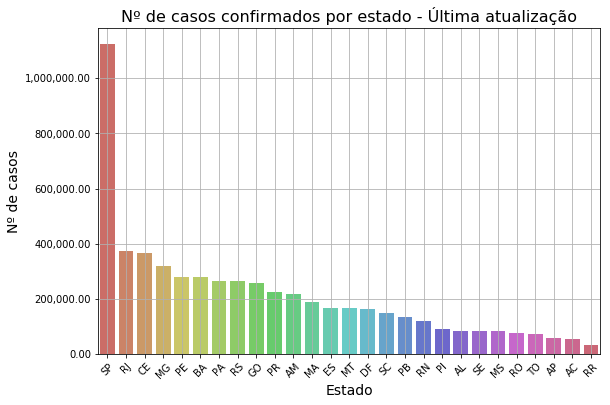

In [68]:
# número de casos por estado (última atualização)
estados_casos_last = df1[(df1['place_type'] == 'state') & df1['is_last'] == True]
estados_casos_last.set_index('state', inplace = True)
estados_casos_last.sort_values('confirmed', ascending=False, inplace = True)

plt.figure(figsize=(9,6))
ax = sns.barplot(data = estados_casos_last, x = estados_mortes_last.index, y = 'confirmed', 
            palette= 'hls')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Nº de casos confirmados por estado - Última atualização', fontsize = 16)
plt.xlabel('Estado', fontsize = 14)
plt.ylabel('Nº de casos', fontsize = 14)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

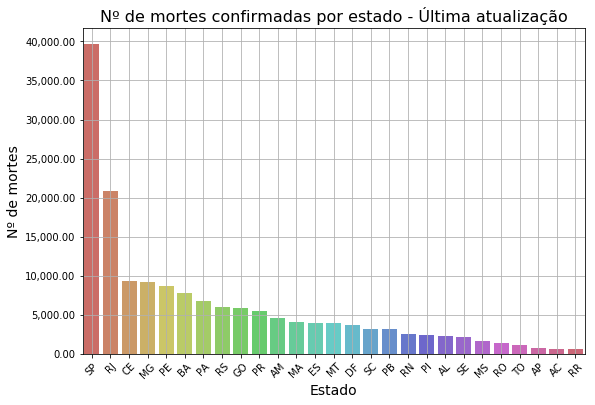

In [38]:
# número de mortes por estado (última atualização)
estados_mortes_last = df1[(df1['place_type'] == 'state') & df1['is_last'] == True]
estados_mortes_last.set_index('state', inplace = True)
estados_mortes_last.sort_values('deaths', ascending=False, inplace = True)

plt.figure(figsize=(9,6))
ax = sns.barplot(data = estados_mortes_last, x = estados_mortes_last.index, y = 'deaths', 
            palette= 'hls')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Nº de mortes confirmadas por estado - Última atualização', fontsize = 16)
plt.xlabel('Estado', fontsize = 14)
plt.ylabel('Nº de mortes', fontsize = 14)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

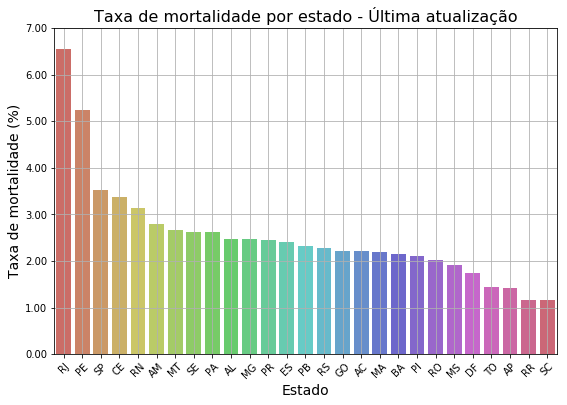

In [39]:
# taxa de mortalidade por estado 
plt.figure(figsize = (9,6))
estados_taxa = df1[(df1['place_type'] == 'state') & df1['is_last'] == True]
estados_taxa.set_index('state', inplace = True)
estados_taxa.sort_values('death_rate', ascending = False, inplace = True)

ax = sns.barplot(data = estados_taxa, x = estados_taxa.index, y = 'death_rate', palette = 'hls')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Taxa de mortalidade por estado - Última atualização', fontsize = 16)
plt.xlabel('Estado', fontsize = 14)
plt.ylabel('Taxa de mortalidade (%)', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylim(0.00, 7.00, 0.5)
plt.grid()
plt.show()

# 6.0. VERIFICAÇÃO DAS HIPÓTESES

#### Hipótese: das 30 cidades com maior taxa de mortalidade, a maioria pertence ao estado de SP (estado mais populoso do país)

In [ ]:
# 30 cidades com maior índice de mortalidade, com mais de 1000 casos confirmados, no Brasil
maior_taxa = df1[(df1['place_type'] == 'city') & (df1['is_last'] == True) & (df1['confirmed'] >= 1000)]
maior_taxa.sort_values('death_rate', ascending = False, inplace = True)
maior_taxa = maior_taxa.head(30)
taxas = maior_taxa['death_rate']

In [ ]:
# labels com cidade e estado para o eixo x
labels = []

for x in zip(maior_taxa['city'], maior_taxa['state']):
    label = x[0] + ' (' + x[1] + ')'
    labels.append(label)

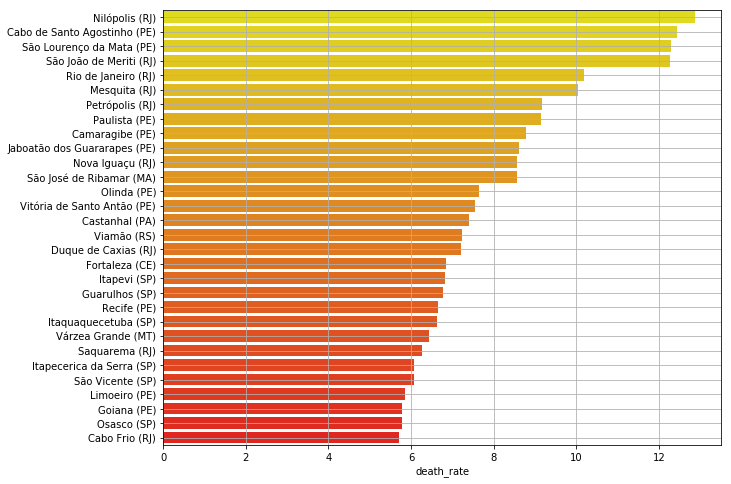

In [42]:
plt.figure(figsize = (10,8))

ax = sns.barplot( x = taxas, y = labels,
           palette = 'autumn_r', orient = 'h')
#ax.set_xticklabels(labels, rotation = 90)

plt.grid()
plt.show()

##### Percebemos que, das 30 cidades com maiores taxas de mortalidade, apenas 6 pertencem ao estado de SP. Observamos também que, das 9 cidades do RJ, 5 são da baixada fluminense, além da própria capital. 

##### Temos a seguinte ordem:

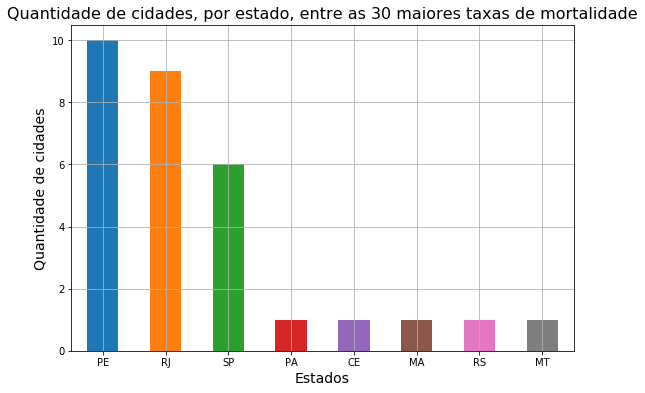

In [120]:
maior_taxa['state'].value_counts().plot(kind = 'bar', figsize = (9,6))

plt.title('Quantidade de cidades, por estado, entre as 30 maiores taxas de mortalidade', fontsize = 16)
plt.xlabel('Estados', fontsize = 14)
plt.ylabel('Quantidade de cidades', fontsize = 14)
plt.xticks(rotation = 0)
plt.grid()
plt.show()

#### Hipótese: A maioria das cidades com mais de 500k habitantes possui taxa de mortalidade acima de 5%.

In [121]:
# utilizaremos apenas cidades que possuem a coluna is_last == True
taxa_500k = df1[(df1['mais_500k'] == 0) & (df1['is_last'] == True) & (df1['place_type'] == 'city')] 
taxa_500k.sort_values('death_rate', ascending = False, inplace = True)

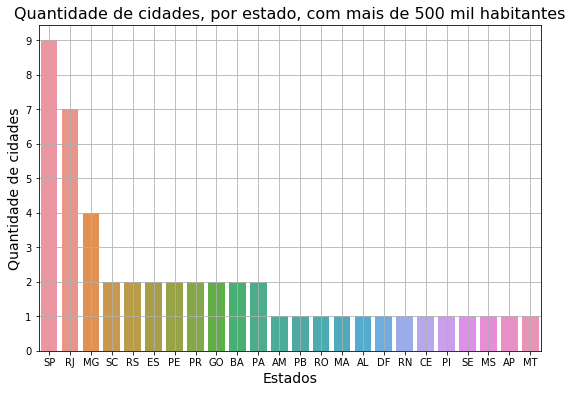

In [122]:
estados = taxa_500k['state'].value_counts().index
quantidades = taxa_500k['state'].value_counts().values

plt.figure(figsize = (9,6))
sns.barplot( x = estados, y = quantidades)
plt.title('Quantidade de cidades, por estado, com mais de 500 mil habitantes', fontsize = 16)
plt.xlabel('Estados', fontsize = 14)
plt.ylabel('Quantidade de cidades', fontsize = 14)
plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()

##### A hipótese não foi validada, pois apenas 12 das 49 cidades com mais de 500k habitantes possuem taxa de mortalidade acima de 5%.

In [79]:
print('Quantidade de cidades brasileiras com mais de 500k habitantes: ', 
      taxa_500k.shape[0])
print('Quantidade de cidades com mais de 500k habitantes e taxa de mortalidade acima de 5%: ', 
      taxa_500k[taxa_500k['death_rate'] > 5.00].shape[0])

Quantidade de cidades brasileiras com mais de 500k habitantes:  49
Quantidade de cidades com mais de 500k habitantes e taxa de mortalidade acima de 5%:  12


In [83]:
labels = []

for x in zip(taxa_500k['city'], taxa_500k['state']):
    label = x[0] + ' (' + x[1] + ')'
    labels.append(label)

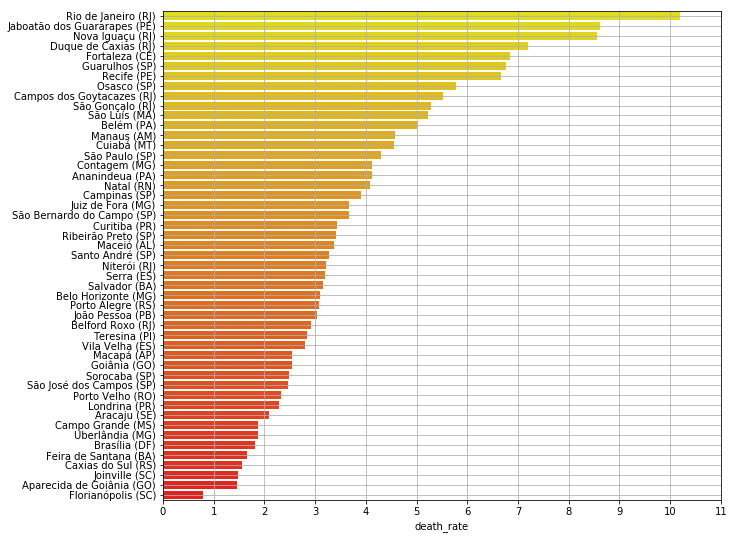

In [98]:
plt.figure(figsize = (10,9))
sns.barplot(x = taxa_500k['death_rate'], y = labels, palette = 'autumn_r', orient = 'h')
#plt.xticks(ticks = [0,2.5,5,7.5,10,12.5])
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11])
plt.grid()
plt.show()

#### Mais de 5% da população de cada cidade da baixada fluminense já foi infectada.

In [183]:
baixada_rj = df1.copy()

In [184]:
cidades_baixada = [ 'Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Japeri', 'Queimados', 'Magé', 
                   'Mesquita', 'Nilópolis', 'Nova Iguaçu', 'São João de Meriti']
baixada_rj['baixada'] = baixada_rj['city'].apply(lambda x: 0 if x in cidades_baixada else 1)
baixada_rj = baixada_rj[(baixada_rj['state'] == 'RJ') & (baixada_rj['baixada'] == 0) & (baixada_rj['is_last'] == True)]

In [185]:
# criamos uma coluna que dirá se a cidade já teve mais de 1% de sua população infectada
baixada_rj['acima_de_1%'] = baixada_rj['confirmed'] > baixada_rj['estimated_population'] * 0.01
baixada_rj['acima_de_1%'] = baixada_rj['acima_de_1%'].apply(lambda x: 0 if x == True else 1)

# separamos as cidades com a coluna 'acima_de_1 == 0' das cidades com a coluna 'acima_de_1 == 1'
acima_de_um = baixada_rj[baixada_rj['acima_de_1%'] == 0].sort_values('acima_de_1%')
abaixo_de_um = baixada_rj[baixada_rj['acima_de_1%'] == 1].sort_values('acima_de_1%')

##### A hipótese não foi validada, pois há 4 cidades nas quais ainda não há 1% da população infectada com a COVID-19. 

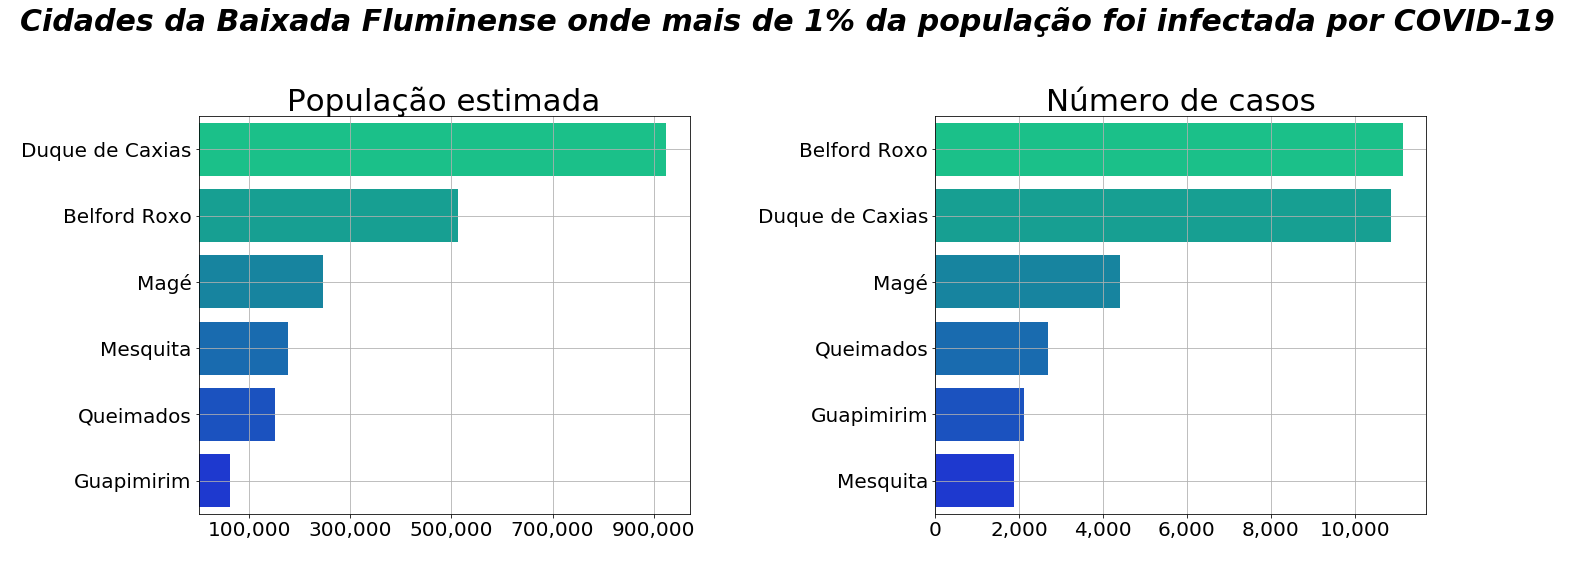

In [230]:
plt.figure(figsize=(22,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.79,
                      wspace=0.5, hspace=0.2)

plt.suptitle('Cidades da Baixada Fluminense onde mais de 1% da população foi infectada por COVID-19 ', 
             fontsize=30 , fontweight = 'bold', fontstyle = 'oblique')
plt.subplot(1,2,1)
ax = sns.barplot(data = acima_de_um.sort_values('estimated_population', ascending = False), 
                 x = 'estimated_population', y = 'city', orient = 'h', palette = 'winter_r')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('População estimada', fontsize = 31)
plt.xlabel(' ', fontsize = 20)
plt.ylabel(' ')
plt.xticks([100000,300000,500000,700000,900000] ,fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

plt.subplot(1,2,2)

ax2 = sns.barplot(data = acima_de_um.sort_values('confirmed', ascending = False), 
                  x = 'confirmed', y = 'city', orient = 'h', palette = 'winter_r')
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Número de casos', fontsize = 31)
plt.xlabel(' ', fontsize = 20)
plt.ylabel(' ')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

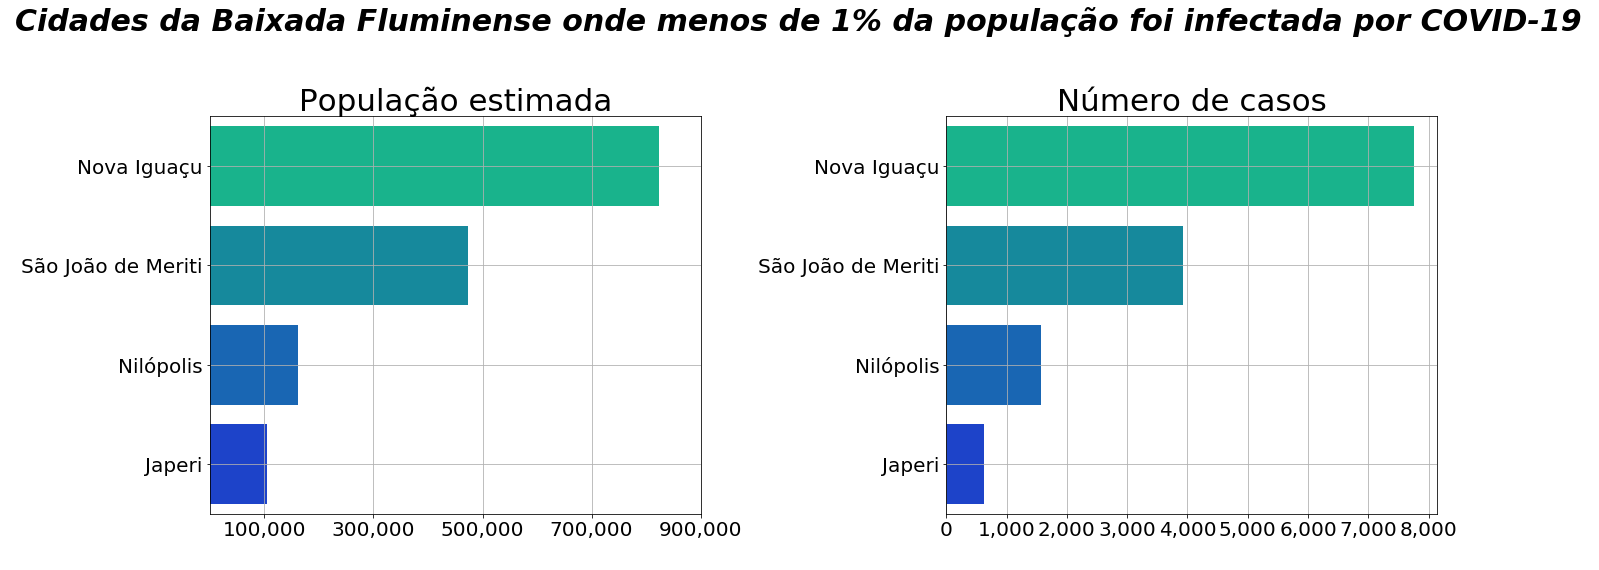

In [234]:
plt.figure(figsize=(22,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.79,
                      wspace=0.5, hspace=0.2)

plt.suptitle('Cidades da Baixada Fluminense onde menos de 1% da população foi infectada por COVID-19 ', 
             fontsize=30 , fontweight = 'bold', fontstyle = 'oblique')
plt.subplot(1,2,1)
ax = sns.barplot(data = abaixo_de_um.sort_values('estimated_population', ascending = False), 
                 x = 'estimated_population', y = 'city', orient = 'h', palette = 'winter_r')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('População estimada', fontsize = 31)
plt.xlabel(' ', fontsize = 20)
plt.ylabel(' ')
plt.xticks([100000,300000,500000,700000,900000] ,fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

plt.subplot(1,2,2)

ax2 = sns.barplot(data = abaixo_de_um.sort_values('confirmed', ascending = False), 
                  x = 'confirmed', y = 'city', orient = 'h', palette = 'winter_r')
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Número de casos', fontsize = 31)
plt.xlabel(' ', fontsize = 20)
plt.ylabel(' ')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()